In [1]:
#setwd('C:/Users/torna/Documents/StatApp/StatApp')
setwd('C:/Users/Kim Antunez/Documents/Projets_autres/StatApp')
#setwd('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
#setwd('/home/aqlt/Documents/Ensae/StatApp')

#devtools::install_github("aqlt/AQLTools")
library(AQLTools)
library(ggplot2)
library(dplyr)
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded



## Chargement des bases de données

In [2]:
#### Indices tweets
tweets <- read.table("data/sentimental_analysis/modeles.csv", sep = ";", stringsAsFactors = FALSE, header=TRUE)
colnames(tweets)[1] <- "Date"

tweets_an <- tweets %>% 
    mutate(Annee=as.numeric(substr(Date,1,4))) %>% 
    group_by(Annee) %>% 
    summarise_if(is.numeric, mean, na.rm = TRUE)

tweets_norm <- cbind(tweets[,1],
                     as.data.frame(apply(tweets[,-1],2,function(x){100 * x / x[1]})))
colnames(tweets_norm)[1] <- "Date"

tweets_an_norm <- cbind(tweets_an[,1],
                     apply(tweets_an[,-1],2,function(x){100 * x / x[1]}))

#tweets <- ymd_ts(tweets, sep_date = "-")
#tweets_norm <- ymd_ts(tweets_norm, sep_date = "-")
#tweets_an <- ts(tweets_an[,-1], start=min(tweets_an$Annee))
#tweets_an_norm <- ts(tweets_an_norm[,-1], start=min(tweets_an_norm$Annee))

In [3]:
#### Données CAMME
camme <- read.table("data/sentimental_analysis/camme.csv", sep = ";", stringsAsFactors = FALSE, header=TRUE)

camme_norm <- camme
camme_norm$Indice <- 100 * camme_norm[,-1] / camme_norm[1,-1]
colnames(camme_norm) <- c("Date","Camme")

camme_decal <- camme
camme_decal$Indice <- c(camme_decal$Indice[-1],NA)

camme_decal_norm <- camme
camme_decal_norm$Indice <- 100 * camme_decal_norm[,-1] / camme_decal_norm[1,-1]
colnames(camme_decal_norm) <- c("Date","Camme")

#camme <- ymd_ts(camme, sep_date = "-")
#camme_norm <- ymd_ts(camme_norm, sep_date = "-")

In [4]:
#### Données Baromètre
baro <- readRDS("data/sentimental_analysis/barometre.RDS")

baro_norm <- cbind(baro[,1],
                     as.data.frame(apply(baro[,-1],2,function(x){100 * x / x[1]})))

#baro <- ts(baro[,-1], start=min(baro$Annee))
#baro_norm <- ts(baro_norm[,-1], start=min(baro_norm$Annee))

In [5]:
#### Données mensuelles finales
indices_mois <- merge(tweets_norm, camme_norm, by="Date",stringAsFactors=FALSE)

indices_mois_decal <- merge(tweets_norm, camme_decal_norm, by="Date",stringAsFactors=FALSE)


indices_mois_evol <- cbind(indices_mois[,1],
                           as.data.frame(apply(indices_mois[,-1],2,function(x){100 * (x - c(NA,x[-length(x)]))/ c(NA,x[-length(x)]) })))

indices_mois_evol_decal <- cbind(indices_mois_decal[,1],
                           as.data.frame(apply(indices_mois_decal[,-1],2,function(x){100 * (x - c(NA,x[-length(x)]))/ c(NA,x[-length(x)]) })))


In [6]:
#### Données annuelles finales
indices_an <- merge(tweets_an_norm, baro_norm, by="Annee",stringAsFactors=FALSE)


# Exploitations mensuelles (Camme)

### En statique

Graphique des séries

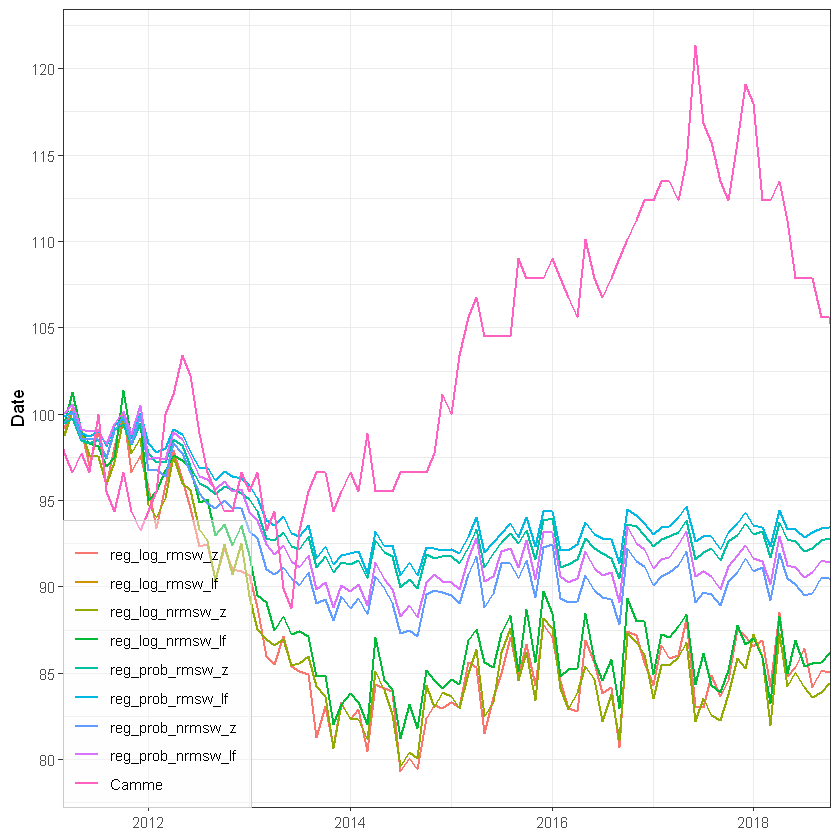

In [7]:
graph_ts(ymd_ts(indices_mois, sep_date = "-"))

Corrélations

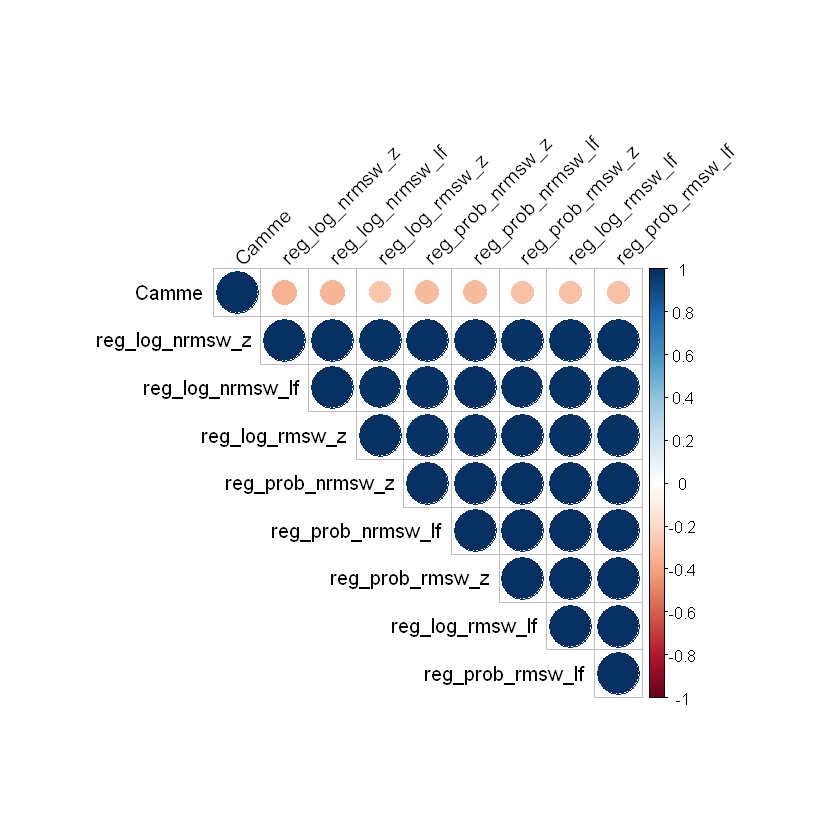

In [8]:
corrplot(cor(indices_mois[,-1]), type="upper", order="hclust", tl.col="black", tl.srt=45)

### En évolution

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


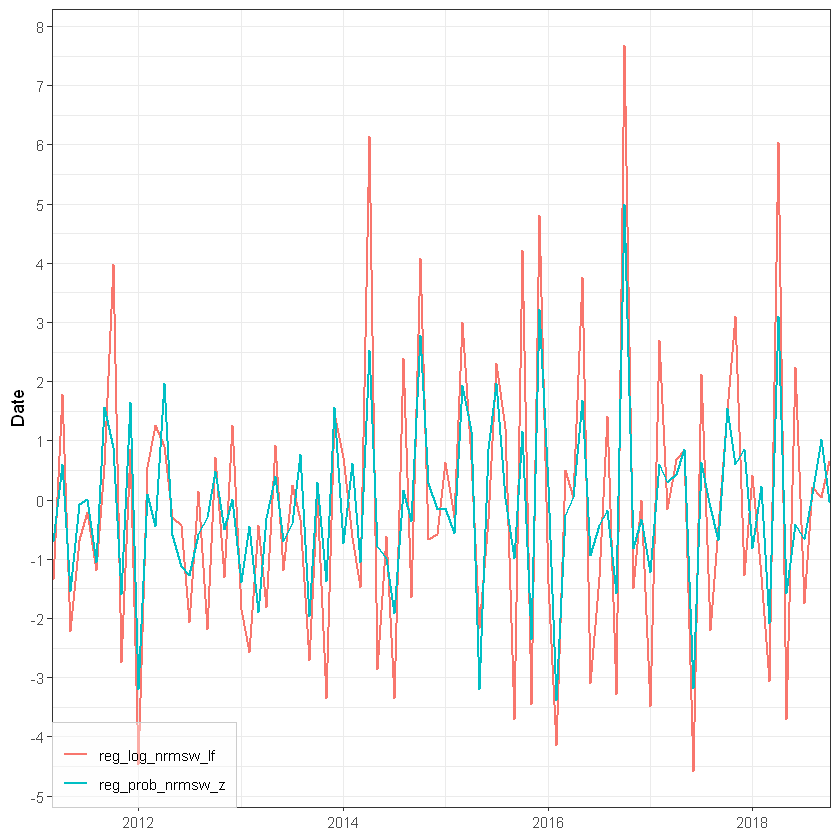

In [9]:
graph_ts(ymd_ts(indices_mois_evol[,c(1,5,8)]))

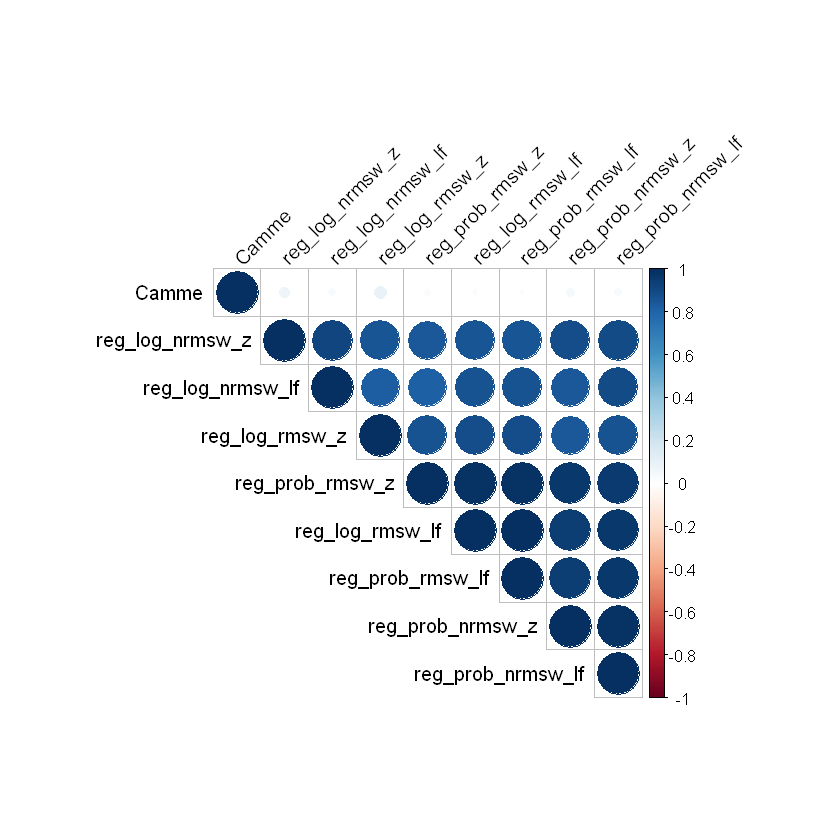

In [10]:
corrplot(cor(indices_mois_evol[-1,-1]), type="upper", order="hclust", tl.col="black", tl.srt=45)

### En statique (en décalant d'un mois)

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


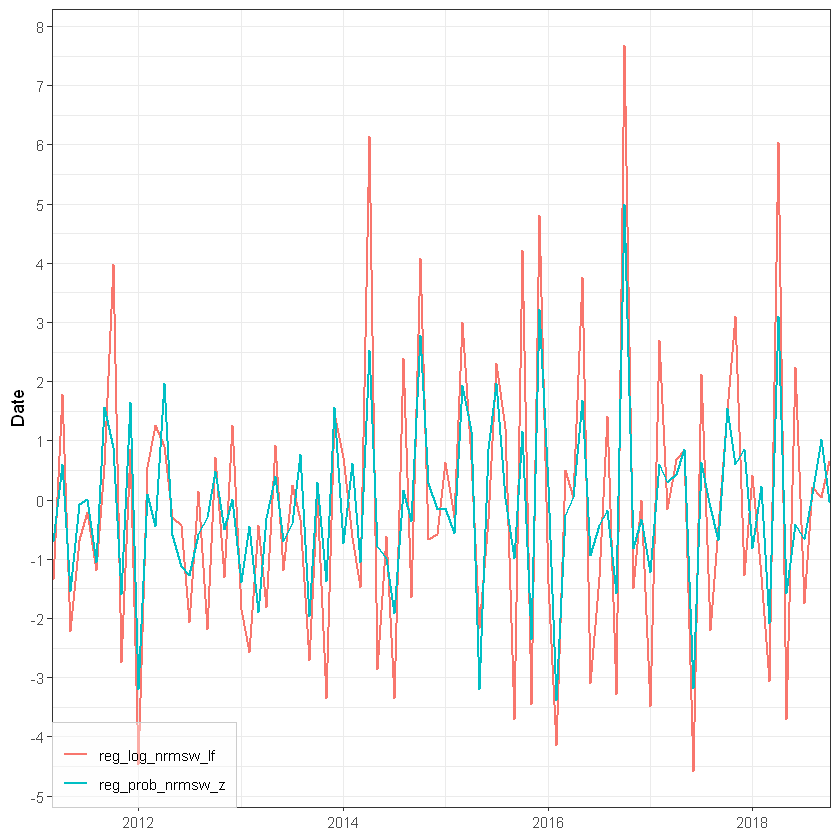

In [11]:
graph_ts(ymd_ts(indices_mois_evol_decal[,c(1,5,8)]))

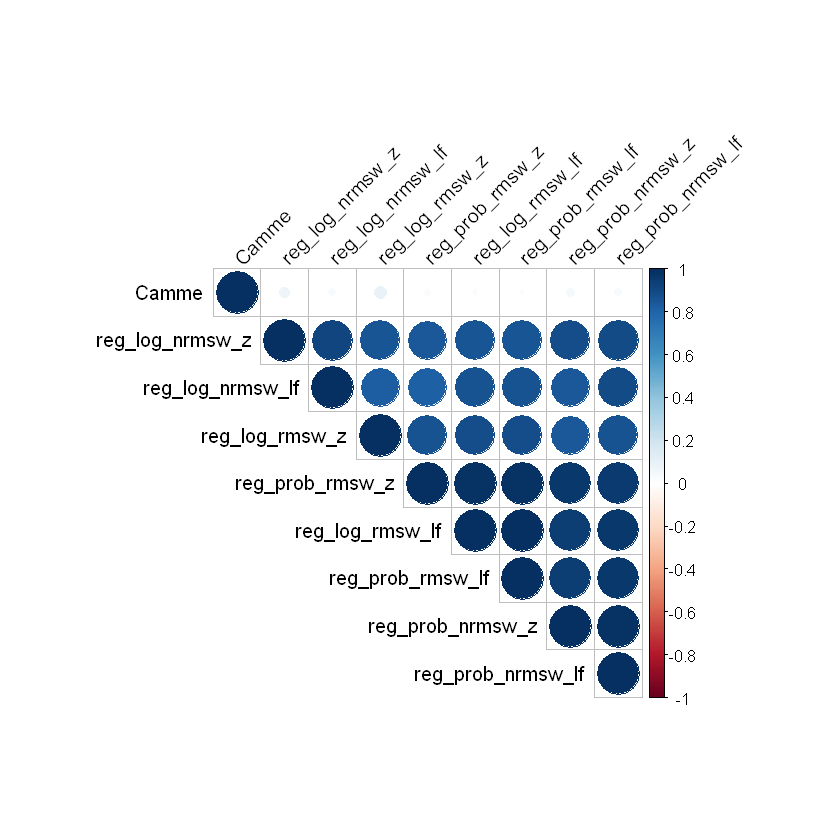

In [12]:
corrplot(cor(indices_mois_evol_decal[-1,-1]), type="upper", order="hclust", tl.col="black", tl.srt=45)

### En évolution (en décalant d'un mois)

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


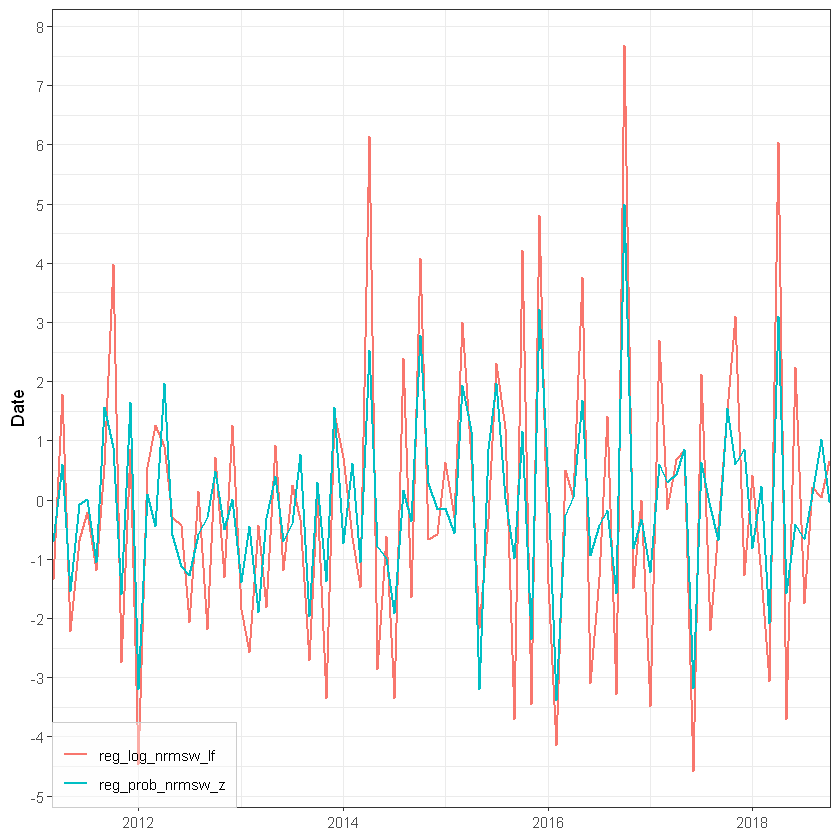

In [13]:
graph_ts(ymd_ts(indices_mois_evol_decal[,c(1,5,8)]))

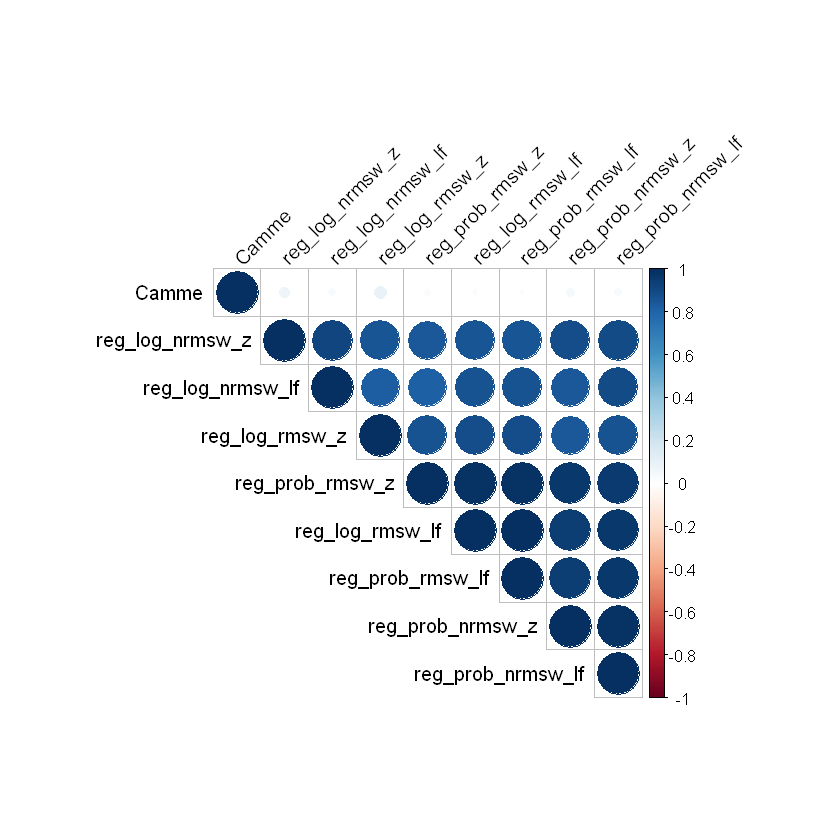

In [14]:
corrplot(cor(indices_mois_evol_decal[-1,-1]), type="upper", order="hclust", tl.col="black", tl.srt=45)

# Exploitations annuelles (Baromètre)

In [15]:
corrplot(cor(indices_an[,-c(1,2,3,4,6,7,12)]), type="upper", order="hclust", tl.col="black", tl.srt=45)

ERROR: Error in hclust(as.dist(1 - corr), method = hclust.method): NA/NaN/Inf dans un appel à une fonction externe (argument 10)


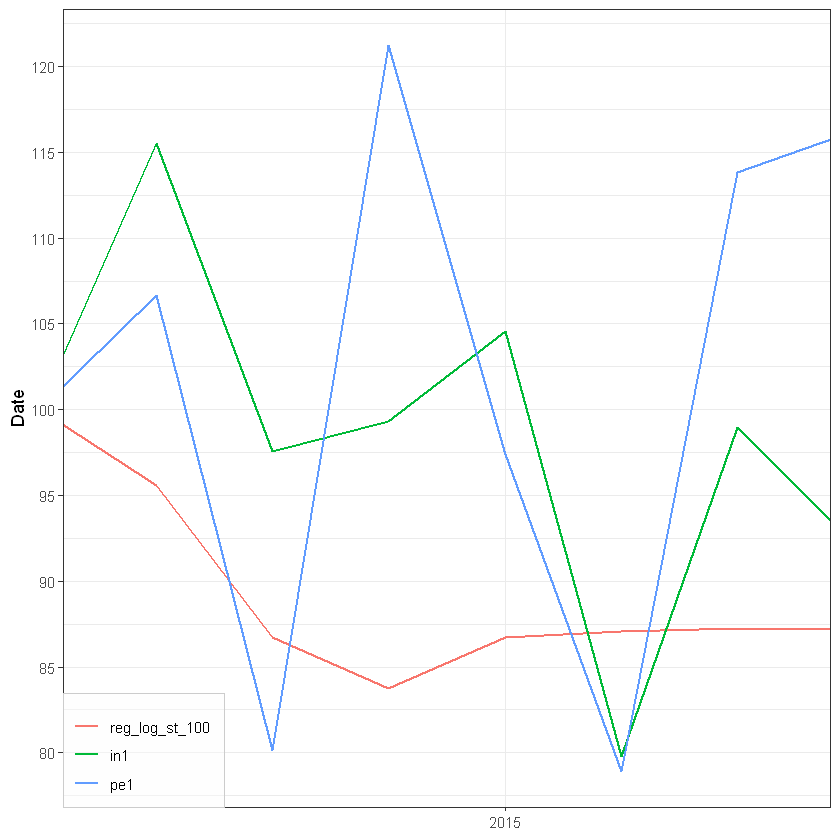

In [57]:
graph_ts(ymd_ts(indices_an[,c("Annee","reg_log_st_100","in1","pe1")]))

In [51]:
# marche pas sur jupyter hélas...
#chart <- AQLTools::hc_stocks(ymd_ts(indices_an, sep_date = "-"))

#https://github.com/jbkunst/highcharter/issues/468
#library(htmlwidgets)
#library(IRdisplay)
#saveWidget(chart, 'chart.html', selfcontained = TRUE)
#display_html('<iframe src="chart.html" width="800" height="600"></iframe>')